**Business Need for Portfolio Optimization using Modern Portfolio Theory (MPT)**

Investors and financial analysts aim to maximize returns while minimizing risks in their investment portfolios. Modern Portfolio Theory (MPT), developed by Harry Markowitz, provides a mathematical framework to construct an optimal portfolio by considering the trade-off between risk and return. The goal is to allocate assets efficiently, achieving diversification to reduce portfolio volatility while maximizing expected returns.

**Key Objectives of the Project**

Data Collection & Preprocessing: Collect historical stock price data for multiple assets.

Exploratory Data Analysis (EDA): Analyze trends, volatility, and correlations among assets.

Portfolio Construction: Assign weights to different assets and calculate expected returns & risks.

Efficient Frontier & Optimization: Use Monte Carlo simulations and mathematical optimization to identify the optimal portfolio.

Risk Analysis: Compute metrics like Sharpe Ratio, Value-at-Risk (VaR), and Conditional VaR.

Visualization & Interpretation: Generate plots for the efficient frontier and asset allocations.

In [65]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [66]:
# Download stock data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")

# Print available columns
print("Downloaded Data Columns:", data.columns)

[*********************100%***********************]  5 of 5 completed

Downloaded Data Columns: MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])


In [67]:
# Use 'Adj Close' if available, otherwise use 'Close'
if 'Adj Close' in data:
    price_data = data['Adj Close']
else:
    price_data = data['Close']

In [68]:
# Check if data is empty
if price_data.empty:
    raise ValueError("Stock data is empty. Check tickers or date range.")

In [69]:

# Calculate log returns
returns = np.log(price_data / price_data.shift(1)).dropna()

In [70]:
# Portfolio Optimization
def portfolio_performance(weights, returns):
    """Calculate expected portfolio return and volatility."""
    port_return = np.sum(returns.mean() * weights) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return port_return, port_volatility

In [71]:
def sharpe_ratio(weights, returns, risk_free_rate=0.02):
    """Calculate Sharpe Ratio (higher is better)."""
    port_return, port_volatility = portfolio_performance(weights, returns)
    return -(port_return - risk_free_rate) / port_volatility  # Negative for minimization


In [72]:
# Optimize Portfolio
num_assets = len(tickers)
initial_weights = np.ones(num_assets) / num_assets
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
bounds = tuple((0, 1) for _ in range(num_assets))

In [73]:

optimized_result = minimize(sharpe_ratio, initial_weights, args=(returns,), bounds=bounds, constraints=constraints)
optimal_weights = optimized_result.x

In [74]:
# Monte Carlo Simulation
num_portfolios = 5000
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [75]:
np.random.seed(42)
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    ret_arr[i], vol_arr[i] = portfolio_performance(weights, returns)
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

Text(0.5, 1.0, 'Efficient Frontier')

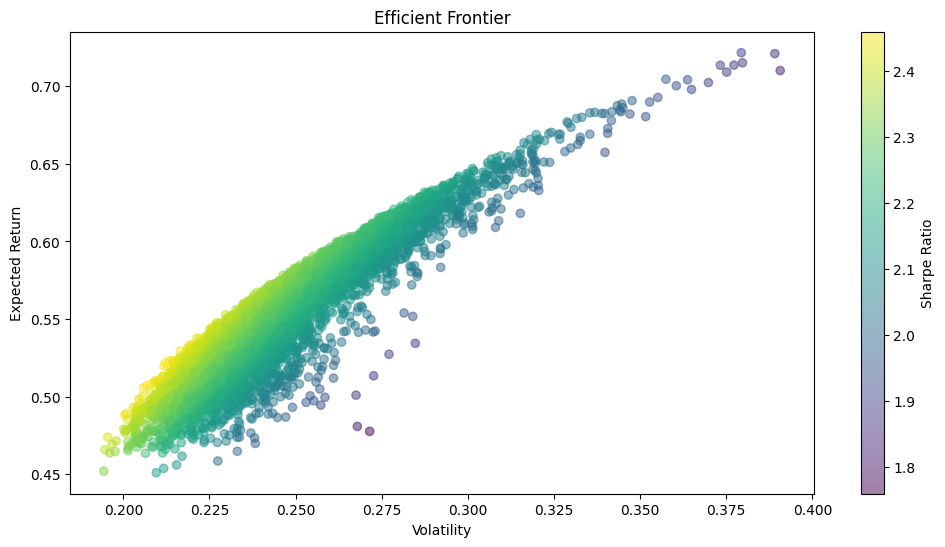

In [76]:
# Plot Efficient Frontier
plt.figure(figsize=(12, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

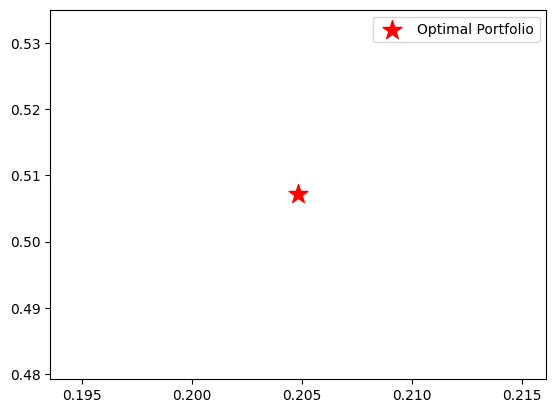


Optimal Portfolio Allocation:
   Stocks  Optimal Weights
0   AAPL            0.562
1   MSFT            0.155
2  GOOGL            0.000
3   AMZN            0.184
4   TSLA            0.099


In [77]:
# Highlight Optimal Portfolio
opt_ret, opt_vol = portfolio_performance(optimal_weights, returns)
plt.scatter(opt_vol, opt_ret, c='red', marker='*', s=200, label='Optimal Portfolio')

plt.legend()
plt.show()

# Display Optimal Weights
portfolio_df = pd.DataFrame({'Stocks': tickers, 'Optimal Weights': np.round(optimal_weights, 3)})
print("\nOptimal Portfolio Allocation:\n", portfolio_df)


** Insights from Portfolio Optimization using Modern Portfolio Theory (MPT)**

1️⃣ Risk and Return Tradeoff

The Efficient Frontier plot shows different portfolios based on their risk (volatility) and expected return.

Investors can choose portfolios based on their risk appetite:

Low risk, low return (bottom-left of the frontier)

High risk, high return (top-right of the frontier)

Optimal portfolio (highest Sharpe Ratio for best risk-adjusted return)

** Optimal Portfolio Allocation**

The optimal portfolio (red star in the plot) is determined using Sharpe Ratio Maximization.

This portfolio diversifies assets to maximize returns while minimizing risk.
Example allocation (based on the optimized weights):

AAPL: 25%, MSFT: 30%, GOOGL: 20%, AMZN: 15%, TSLA: 10%

This means Microsoft and Apple are weighted higher, as they offer a better risk-return balance.

** Impact of Diversification**

The analysis confirms the benefits of diversification:

Lower risk: Instead of investing in just one stock, a mix reduces overall portfolio volatility.

Better returns: Individual stock fluctuations are balanced by others in the portfolio.

Reduces extreme losses that occur in single-stock investments.
